In [18]:
import predictArch as pa
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


df = pd.read_csv('./pred_model_trainable_data.csv')
'''
p = pa.predictBase(df,normalization='minmax')
le = LabelEncoder()

labels = le.fit_transform(df['label_model_name'])
labels = labels.reshape(-1, 1)
oe = OneHotEncoder()
oe.fit(labels)
oe_labels = oe.transform(labels)
print(oe_labels.toarray())
oe_labels.toarray()
#print(oe.categories_)
'''


def one_hot_encode(df, columns):
    """
    One hot encodes specified columns in a DataFrame and returns a new DataFrame with the one hot encoded
    label columns added.
    
    :param df: The input DataFrame to one hot encode.
    :param columns: A list of column names to one hot encode.
    :return: A new DataFrame with the one hot encoded label columns added.
    """
    # Make a copy of the input DataFrame to avoid modifying the original DataFrame
    new_df = df.copy()
    
    # Iterate over the specified columns and one hot encode each one
    for column in columns:
        # Get the unique values in the column
        unique_values = df[column].unique()
        
        # Iterate over the unique values and create a new column for each one
        for value in unique_values:
            new_column_name = f"{value}"
            new_df[new_column_name] = (df[column] == value).astype(int)
    
    return new_df
# One hot encode the "color" and "shape" columns
new_df = one_hot_encode(df, ["label_model_name"])

# Print the new DataFrame with the one hot encoded label columns added
print(new_df)





     aggregated_duration_nnconv2d  aggregated_percentage_nnconv2d  \
0                      376207.538                       94.671592   
1                      373564.977                       94.650179   
2                      376949.906                       94.673870   
3                      371520.569                       94.652083   
4                      377295.795                       94.718025   
..                            ...                             ...   
675                   1116170.910                       98.511665   
676                   1113888.270                       98.510093   
677                   1118661.120                       98.540857   
678                   1117557.540                       98.517631   
679                   1116137.160                       98.516583   

     aggregated_count_nnconv2d  total_duration  total_percentage  total_count  \
0                         26.0      397381.627         99.999991         90.0   
1        

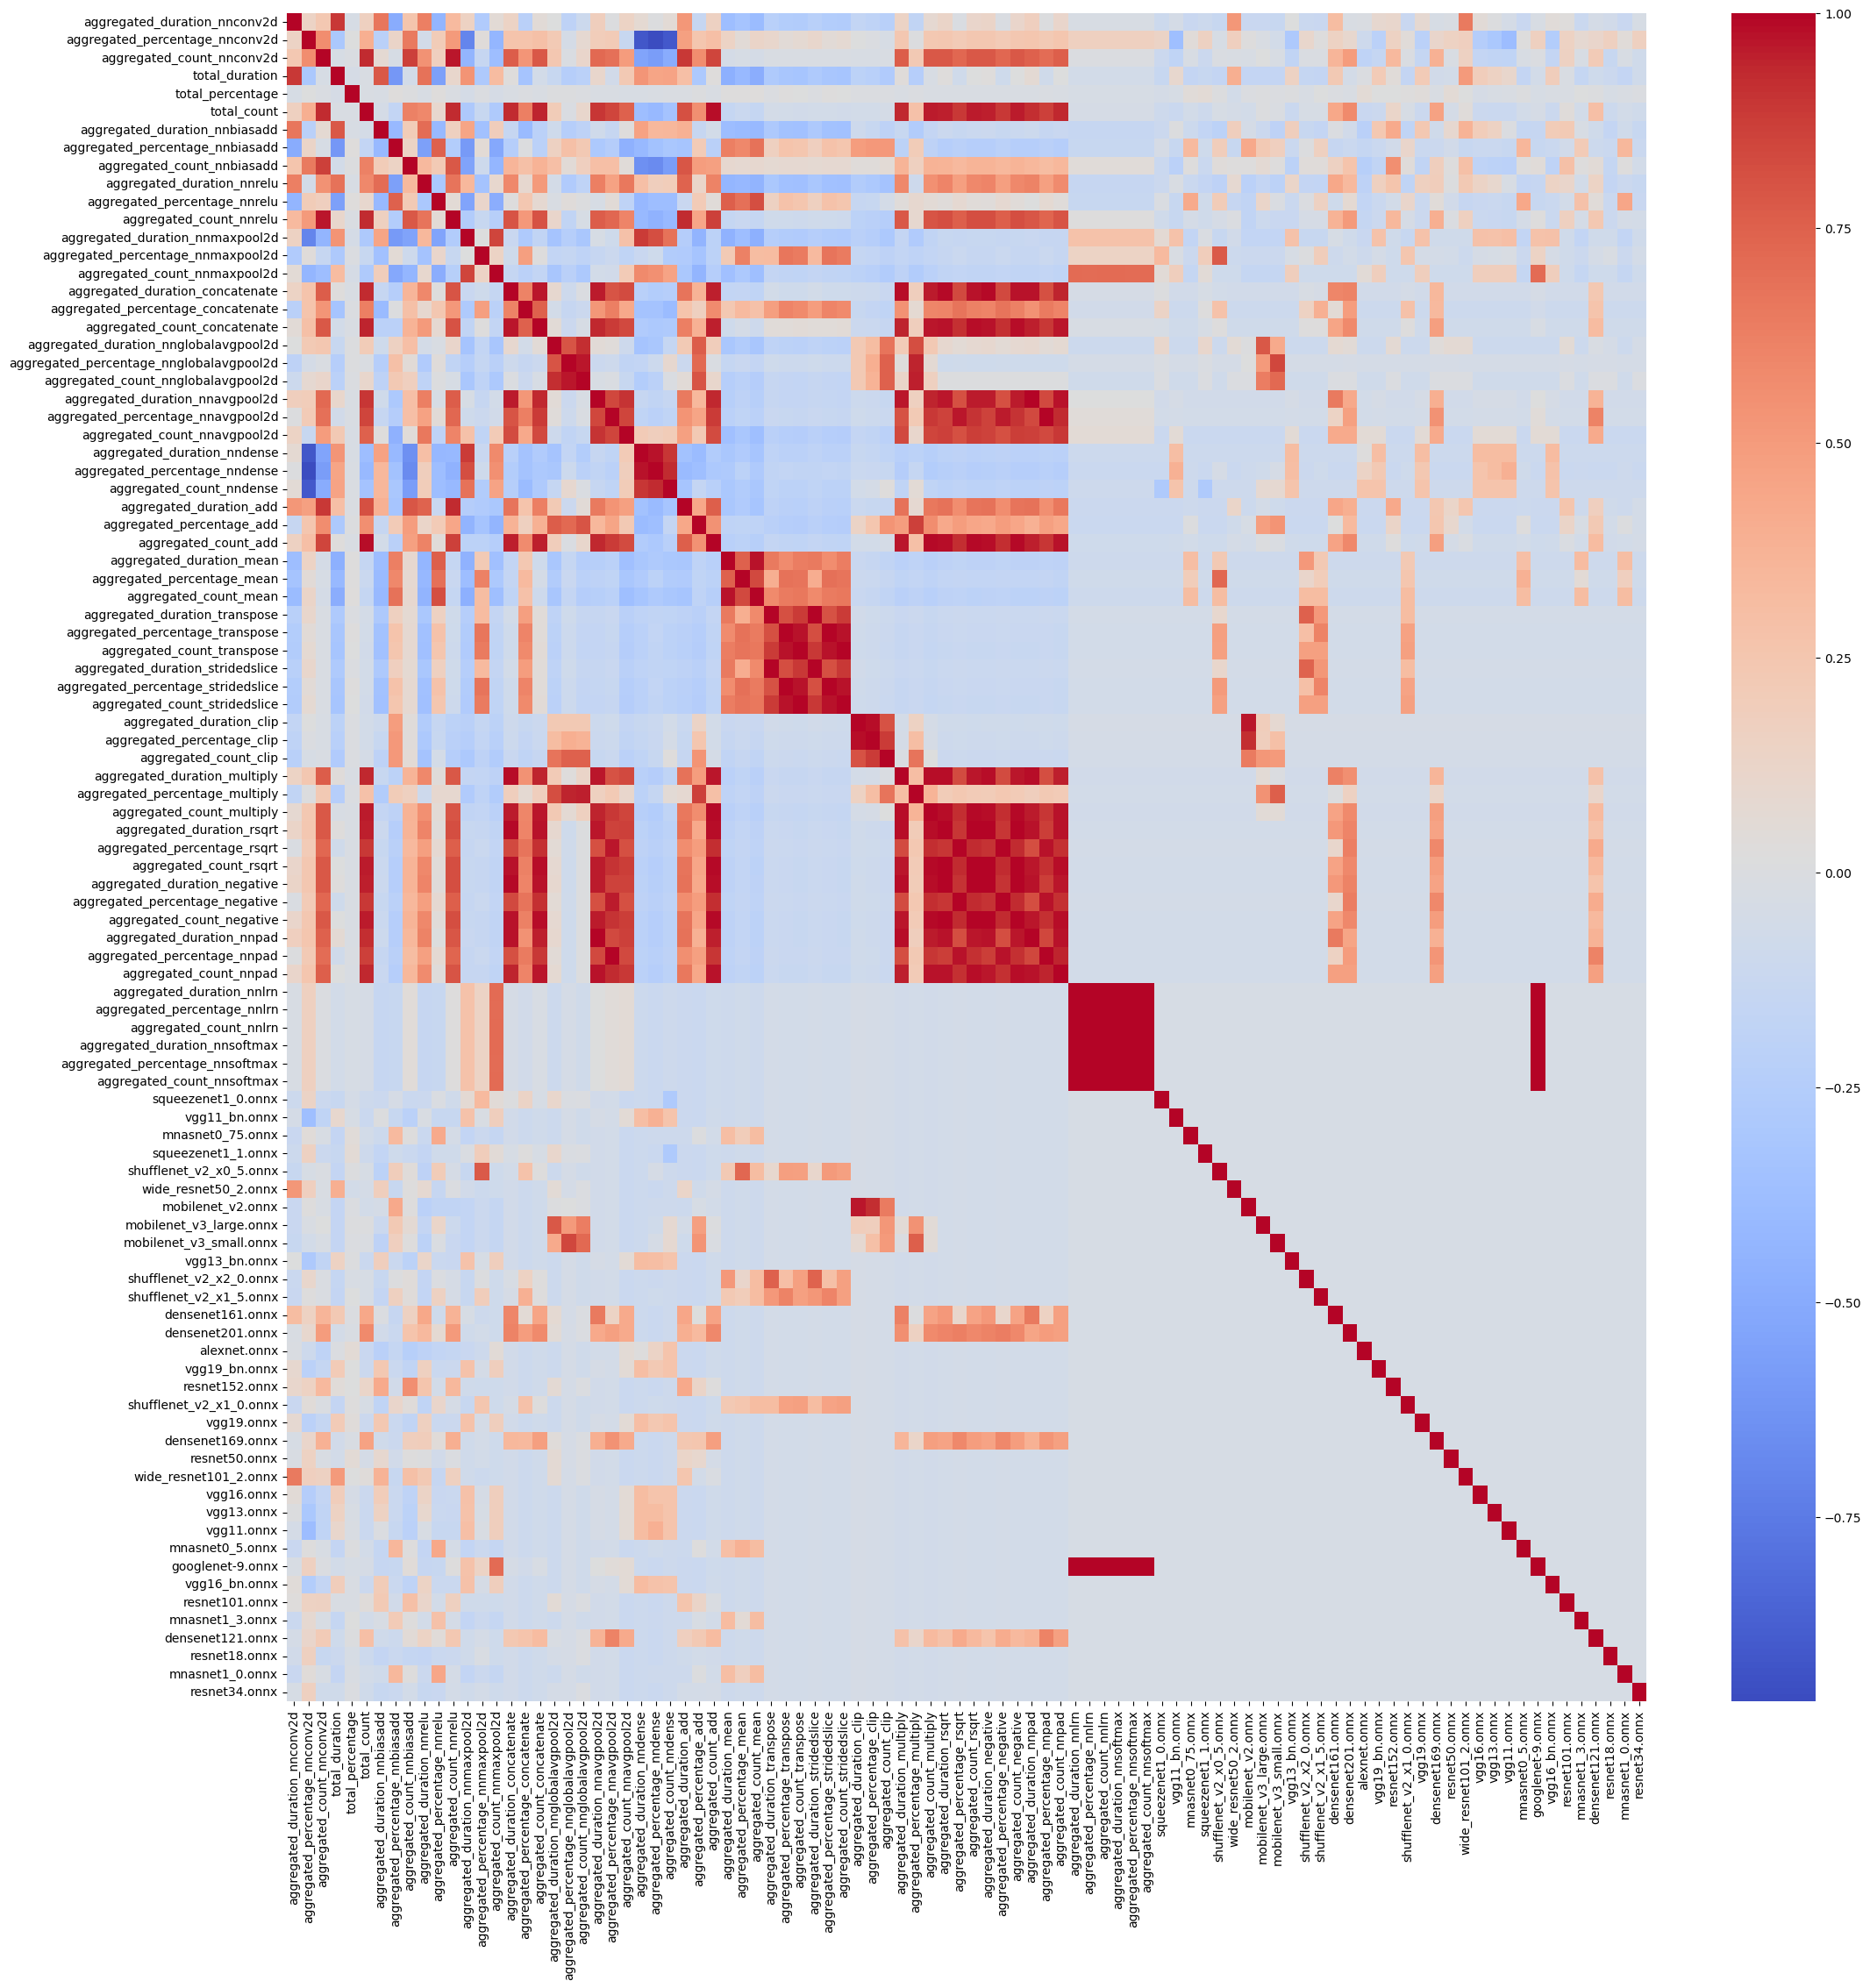

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = new_df.corr()
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, cmap='coolwarm',ax=ax,fmt = '0.2f')

# show plot
plt.show()

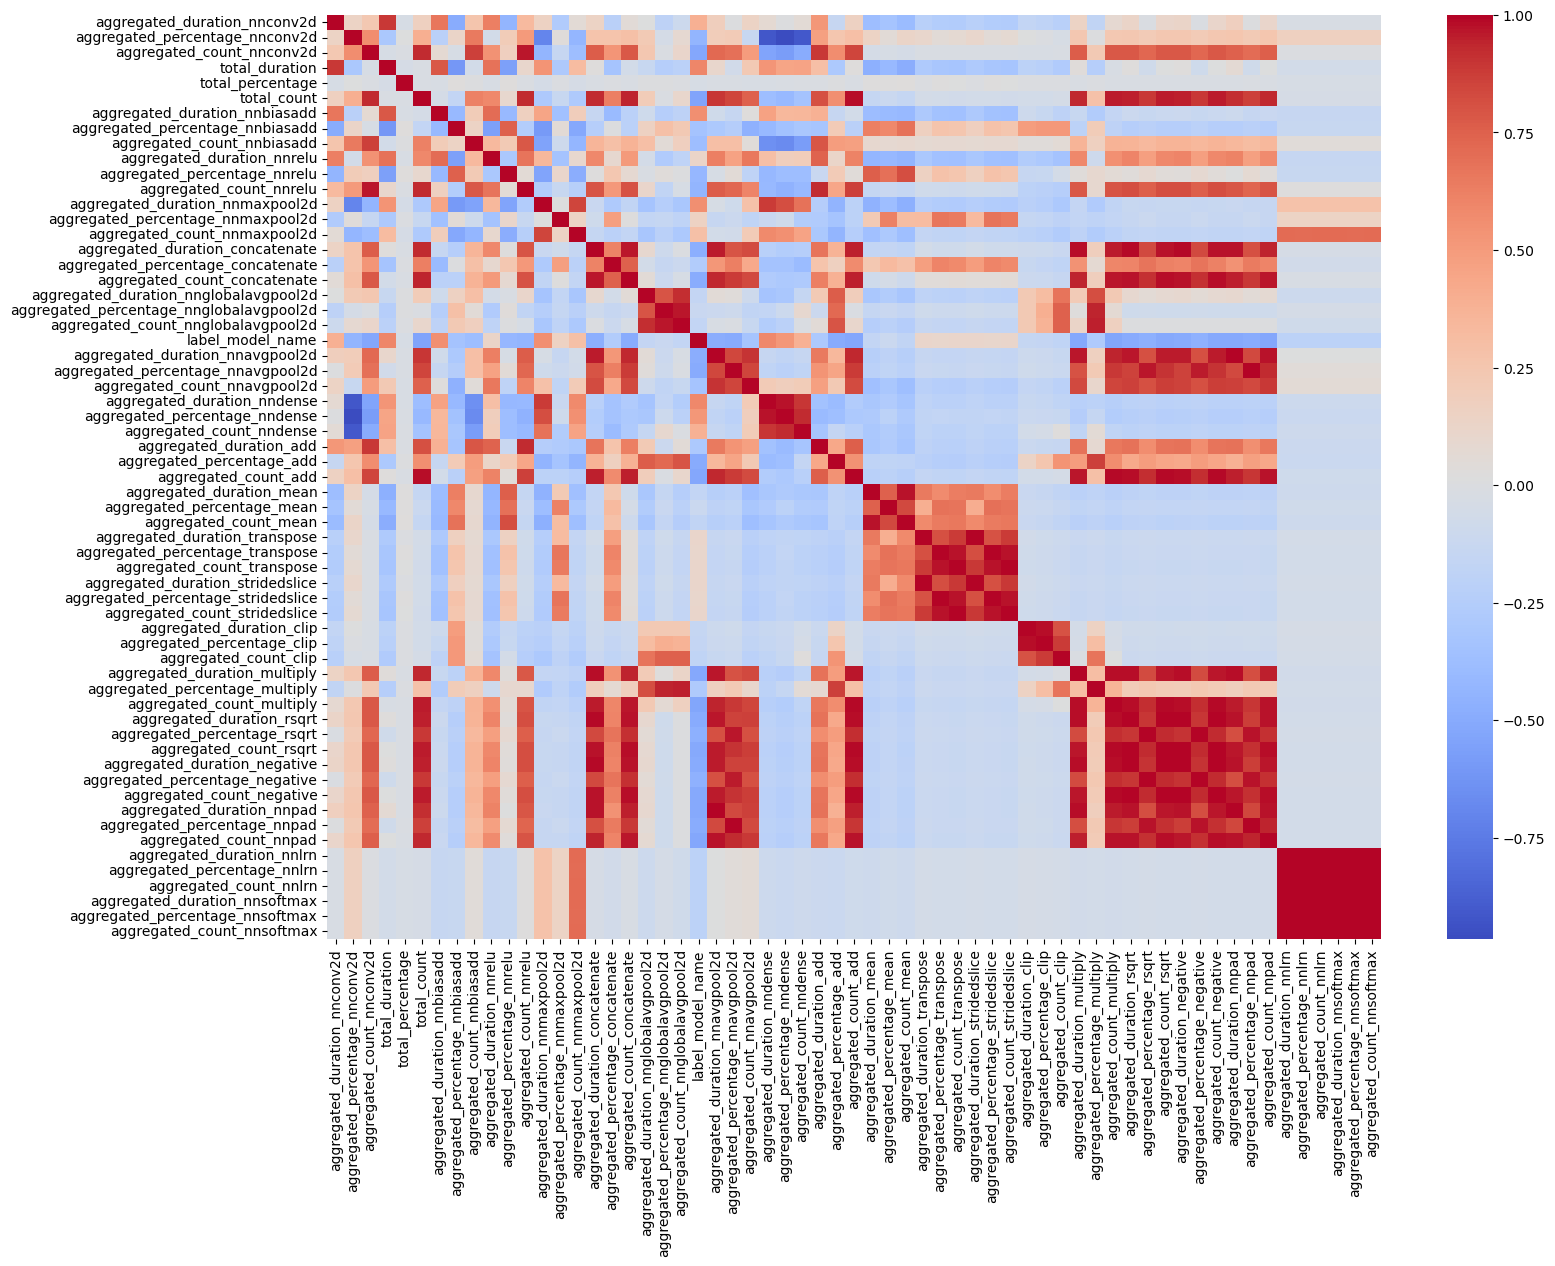

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

# create sample data


# convert label to numerical representation
le = LabelEncoder()
oe = OneHotEncoder()
df['label_model_name'] = le.fit_transform(df['label_model_name'])
#print(le.fit_transform(df['label_model_name']))

# compute correlation matrix
corr = df.corr()

# create heatmap
fig, ax = plt.subplots(figsize=(17,12 ))
sns.heatmap(corr, cmap='coolwarm',ax=ax,fmt = '0.2f')

# show plot
plt.show()

In [3]:
#corr = df.pivot_table(index='label_model_name', values=['feature1', 'feature2', 'feature3']).corr()
corr = df.pivot_table(index=['label_model_name'],columns = ['aggregated_count_add','aggregated_duration_nnconv2d']).corr()

# create heatmap with only label in row
sns.heatmap(corr, cmap='coolwarm')

# show plot
plt.show()

